## Assignment-07-Clustering_Airline_data

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
# Import Dataset
airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name ='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
airline2_norm = norm_func(airline2)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


### Hierarchical Clustering

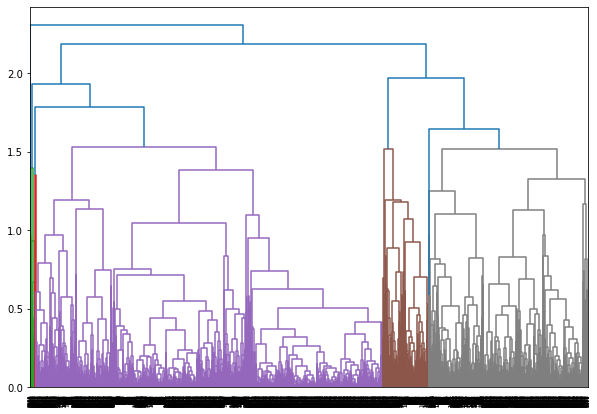

In [11]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [12]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [13]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [14]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [15]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0


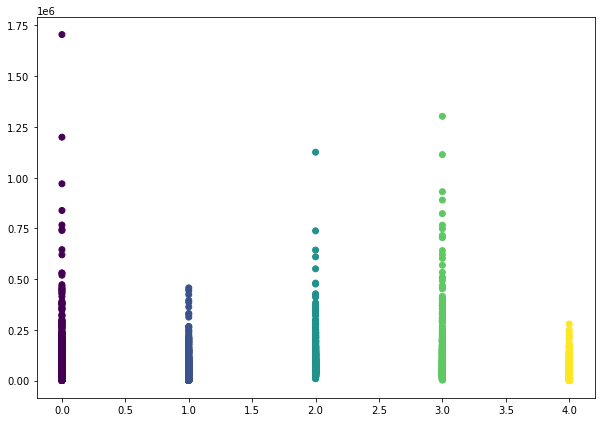

In [16]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) 

### K Means Clustering

In [17]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [18]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

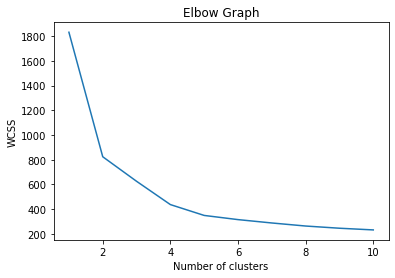

In [19]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster algorithm using K=4

In [20]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [21]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [22]:
# Assign clusters to the data set
airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [23]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.27515792e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.88578059e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [24]:
# Group data by Clusters (K=4)
airline4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0,2.204006
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,0.017831
2,2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0,2.000000
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,1.971535


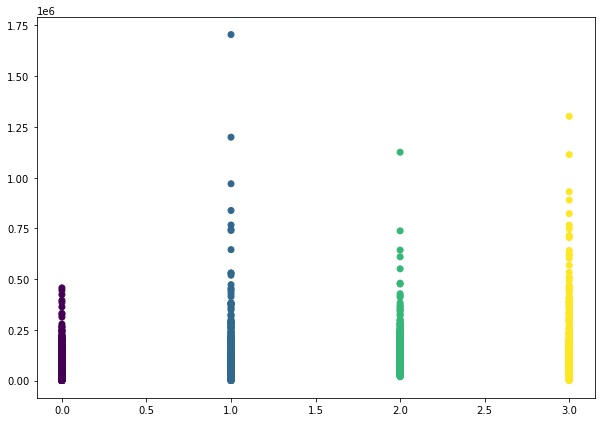

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters4id'],airline4['Balance'], c=clusters4.labels_) 

## Build Cluster algorithm using K=5

In [26]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [27]:
clusters5.labels_

array([4, 4, 4, ..., 1, 0, 0])

In [28]:
# Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,4
1,19244,0,1,1,1,215,2,0,0,6968,0,1,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,4
3,14776,0,1,1,1,500,1,0,0,6952,0,1,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [29]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01,  3.94129174e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -4.99600361e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [30]:
# Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0,3.081395
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,1.971535
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,0.017831
3,3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0,2.000000
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0,1.160138


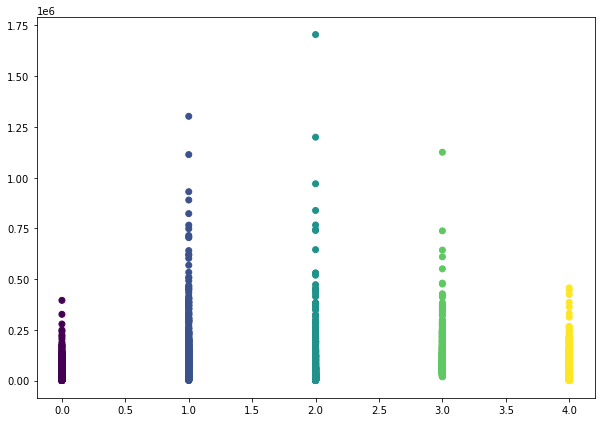

In [31]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 

### DBSCAN Clustering

In [32]:
from sklearn.cluster import DBSCAN 

In [33]:
min_samples=2 #n

In [34]:
dbs=DBSCAN(min_samples=5,eps=0.2)
claas_pr=dbs.fit_predict(airline5.iloc[:,:2])

In [35]:
claas_pr

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [36]:
airline5["class_pr"]=claas_pr
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters5id,class_pr
0,28143,0,1,1,1,174,1,0,0,7000,0,1,4,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,4,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,4,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,4,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0,-1


Text(0, 0.5, 'f2')

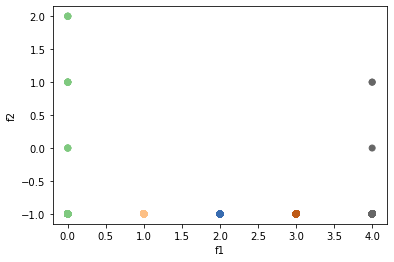

In [43]:
import matplotlib.pyplot as plt
plt.scatter(airline5['clusters5id'],airline5['class_pr'], c=clusters5.labels_,cmap=plt.cm.Accent)
plt.xlabel("f1")
plt.ylabel("f2")

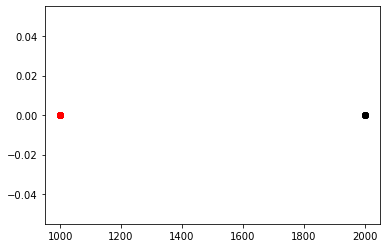

In [38]:
plt.scatter(airline5[airline5["class_pr"]==1].iloc[:,0],airline5[airline5["class_pr"]==1].iloc[:,1],color="red")
plt.scatter(airline5[airline5["class_pr"]==0].iloc[:,0],airline5[airline5["class_pr"]==0].iloc[:,1],color="black")